In [47]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

In [48]:
#DATA preprocessing
import pandas as pd
import numpy as np 
path='./data/'
df = pd.read_csv(path+'test.csv')
df.head()

,date,time,team_home,team_away,home_pitcher,away_batter1,away_batter2,away_batter3,away_batter4,away_batter5,...,home_batter9,away_total,home_total,yard_wOBA,umpire_K/BB,total,over,under,total_score,result
0,2016/6/8,19,BAL,KC,4.54,0.133560,0.161712,0.141664,0.162025,0.168400,...,0.117572,0,4,1.008,2.56962,2.0,1.5,2.5,4.0,over
1,2016/7/1,19,BOS,LAA,4.57,0.128565,0.188355,0.153141,0.234477,0.381657,...,0.021867,0,5,0.956,2.43529,2.0,1.4,2.6,5.0,over
2,2015/4/6,13,DET,MIN,3.24,0.124847,0.141783,0.148824,0.136840,0.127560,...,0.156085,0,3,0.994,2.32558,2.0,2.0,1.9,3.0,over
3,2016/5/13,19,CLE,MIN,4.13,0.130816,0.139188,0.179804,0.150747,0.123340,...,0.143427,4,3,0.994,2.53750,2.0,1.4,2.6,7.0,over
4,2016/5/27,19,CLE,BAL,4.13,0.125488,0.164452,0.188828,0.155944,0.162928,...,0.130370,3,3,0.972,2.23864,2.0,1.4,2.6,6.0,over


In [49]:
import datetime
df['date_new']=df['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y/%m/%d'))
#df['date_new']=df['date_new'].apply(lambda x:datetime.datetime.strftime(x, '%Y/%m/%d'))
df['date_new']=df['date_new'].apply(lambda x:datetime.datetime.strftime(x, '%W')).astype('int64')
df.drop(['date'], axis =1, inplace= True)
df.head()

,time,team_home,team_away,home_pitcher,away_batter1,away_batter2,away_batter3,away_batter4,away_batter5,away_batter6,...,away_total,home_total,yard_wOBA,umpire_K/BB,total,over,under,total_score,result,date_new
0,19,BAL,KC,4.54,0.133560,0.161712,0.141664,0.162025,0.168400,0.147307,...,0,4,1.008,2.56962,2.0,1.5,2.5,4.0,over,23
1,19,BOS,LAA,4.57,0.128565,0.188355,0.153141,0.234477,0.381657,0.121897,...,0,5,0.956,2.43529,2.0,1.4,2.6,5.0,over,26
2,13,DET,MIN,3.24,0.124847,0.141783,0.148824,0.136840,0.127560,0.158853,...,0,3,0.994,2.32558,2.0,2.0,1.9,3.0,over,14
3,19,CLE,MIN,4.13,0.130816,0.139188,0.179804,0.150747,0.123340,0.155667,...,4,3,0.994,2.53750,2.0,1.4,2.6,7.0,over,19
4,19,CLE,BAL,4.13,0.125488,0.164452,0.188828,0.155944,0.162928,0.131848,...,3,3,0.972,2.23864,2.0,1.4,2.6,6.0,over,21


In [50]:
#確認int64欄位是否為0/1格式
df.select_dtypes(include=["int64"]).apply(pd.Series.nunique, axis = 0)

time          12
away_total    17
home_total    19
date_new      29
dtype: int64

In [51]:
#將隊伍進行OneHot encoding
df= df.join(pd.get_dummies(df[['team_home', 'team_away']]))
print(df.shape)
df.head()

(10182, 89)


,time,team_home,team_away,home_pitcher,away_batter1,away_batter2,away_batter3,away_batter4,away_batter5,away_batter6,...,team_away_PHI,team_away_PIT,team_away_SD,team_away_SEA,team_away_SF,team_away_STL,team_away_TB,team_away_TEX,team_away_TOR,team_away_WSH
0,19,BAL,KC,4.54,0.133560,0.161712,0.141664,0.162025,0.168400,0.147307,...,0,0,0,0,0,0,0,0,0,0
1,19,BOS,LAA,4.57,0.128565,0.188355,0.153141,0.234477,0.381657,0.121897,...,0,0,0,0,0,0,0,0,0,0
2,13,DET,MIN,3.24,0.124847,0.141783,0.148824,0.136840,0.127560,0.158853,...,0,0,0,0,0,0,0,0,0,0
3,19,CLE,MIN,4.13,0.130816,0.139188,0.179804,0.150747,0.123340,0.155667,...,0,0,0,0,0,0,0,0,0,0
4,19,CLE,BAL,4.13,0.125488,0.164452,0.188828,0.155944,0.162928,0.131848,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#捨棄原本文字版的隊伍欄
df.drop(['team_home', 'team_away'], axis= 1, inplace= True)
df.shape

(10182, 87)

In [53]:
train_y = df['result']
#接結果切出、捨棄賽果
df.drop(['result','total_score','over','under','away_total','home_total'], axis =1, inplace= True)
df.head()

,time,home_pitcher,away_batter1,away_batter2,away_batter3,away_batter4,away_batter5,away_batter6,away_batter7,away_batter8,...,team_away_PHI,team_away_PIT,team_away_SD,team_away_SEA,team_away_SF,team_away_STL,team_away_TB,team_away_TEX,team_away_TOR,team_away_WSH
0,19,4.54,0.133560,0.161712,0.141664,0.162025,0.168400,0.147307,0.147126,0.162019,...,0,0,0,0,0,0,0,0,0,0
1,19,4.57,0.128565,0.188355,0.153141,0.234477,0.381657,0.121897,0.148551,0.139788,...,0,0,0,0,0,0,0,0,0,0
2,13,3.24,0.124847,0.141783,0.148824,0.136840,0.127560,0.158853,0.138554,0.119803,...,0,0,0,0,0,0,0,0,0,0
3,19,4.13,0.130816,0.139188,0.179804,0.150747,0.123340,0.155667,0.126471,0.153613,...,0,0,0,0,0,0,0,0,0,0
4,19,4.13,0.125488,0.164452,0.188828,0.155944,0.162928,0.131848,0.146802,0.115407,...,0,0,0,0,0,0,0,0,0,0


In [54]:
train_y.head()

0    over
1    over
2    over
3    over
4    over
Name: result, dtype: object

In [55]:
#抓取所有數值格式欄位
features=[]
for dtype, feature in zip(df.dtypes, df.columns):
    if dtype == 'float64' or dtype =='int64':
        if df[feature].nunique != 2 and feature != 'time' and feature !='total':
            features.append(feature)
print(features)                

['home_pitcher', 'away_batter1', 'away_batter2', 'away_batter3', 'away_batter4', 'away_batter5', 'away_batter6', 'away_batter7', 'away_batter8', 'away_batter9', 'away_pitcher', 'home_batter1', 'home_batter2', 'home_batter3', 'home_batter4', 'home_batter5', 'home_batter6', 'home_batter7', 'home_batter8', 'home_batter9', 'yard_wOBA', 'umpire_K/BB', 'date_new']


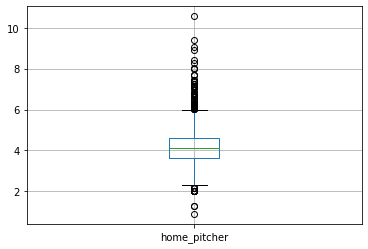

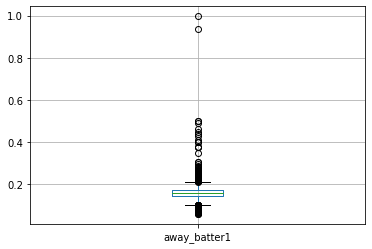

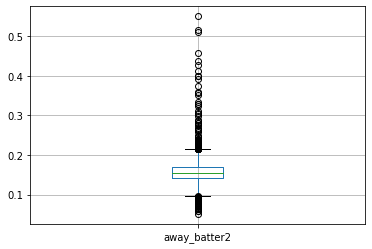

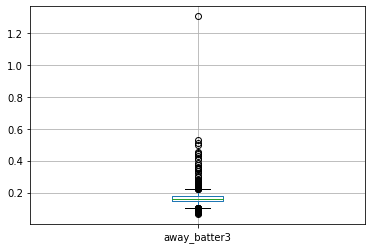

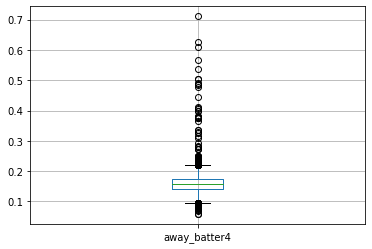

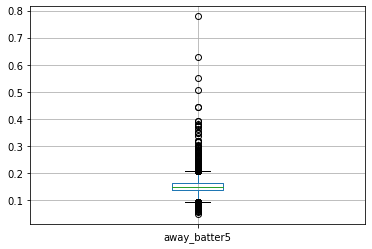

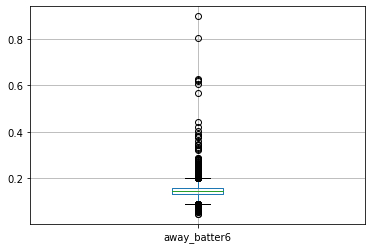

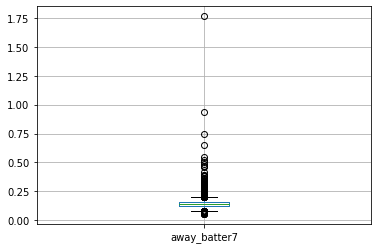

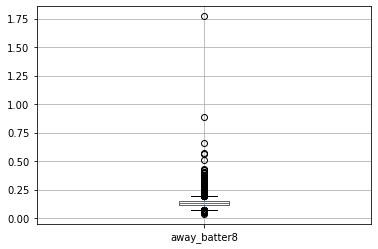

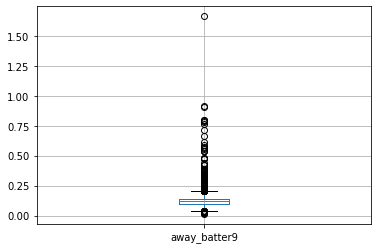

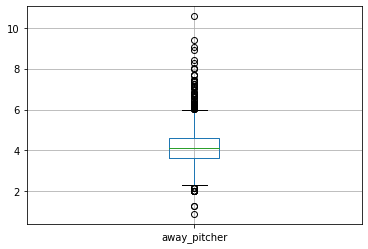

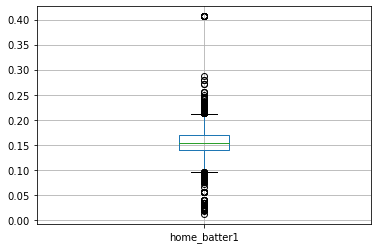

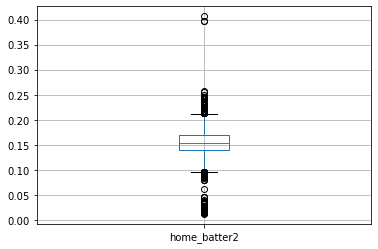

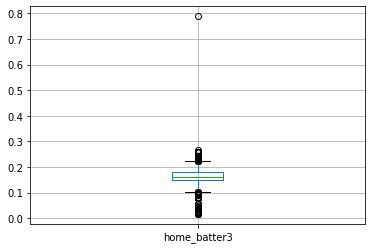

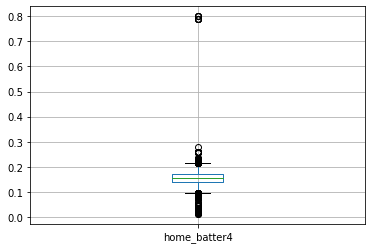

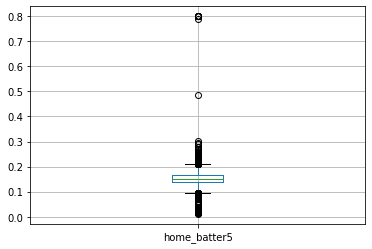

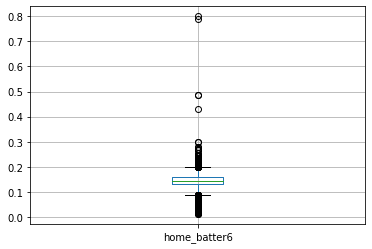

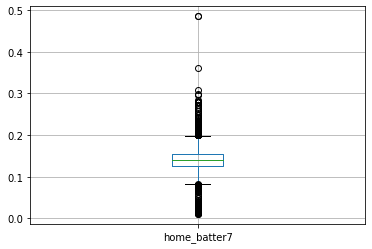

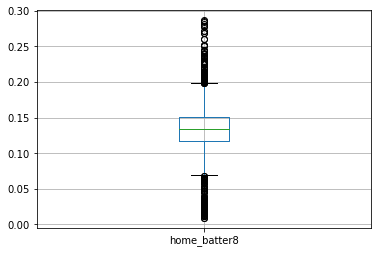

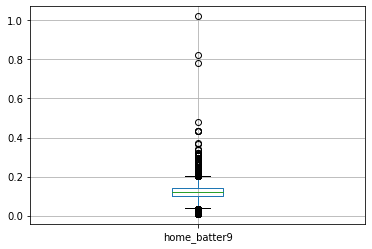

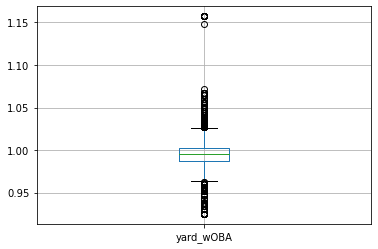

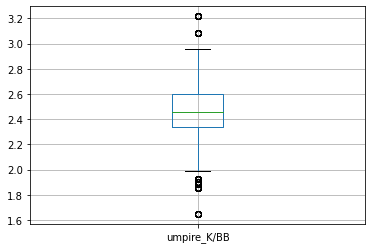

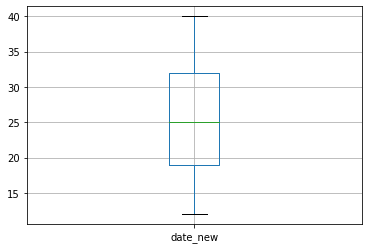

In [56]:
#盒鬚圖確認有無離群值
import matplotlib.pyplot as plt
for col in features:
    df.boxplot(col)
    plt.show()

In [57]:
#去除偏態(嘗試用Q01，Q99來代替離群值）
for i in features:
    Q01 = np.percentile(df[i], 1)
    Q99 = np.percentile(df[i], 99)
    # 替换异常值为指定的分位数
    if Q01 > df[i].min():
        df[i].loc[df[i] < Q01] = Q01
    if Q99 < df[i].max():
        df[i].loc[df[i] > Q99] = Q99

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
train_y
print(train_y[len(train_y)-1])

under


In [73]:
#調整Y
def y_trans(y):
    for i in range(len(y)):
        if y[i] == 'over':
            y[i] = 2
        elif y[i] == 'tie':
            y[i] = 1
        elif y[i] == 'under':
            y[i] = 0
        else:
            pass
y_trans(train_y)
train_y

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0        2
1        2
2        2
3        2
4        2
        ..
10177    0
10178    2
10179    2
10180    0
10181    0
Name: result, Length: 10182, dtype: object

In [74]:
import keras
def preproc_y(y, num_classes=3):
    y = keras.utils.to_categorical(y, num_classes)
    return y    

In [87]:
train_x = df
train_x.columns

Index(['time', 'home_pitcher', 'away_batter1', 'away_batter2', 'away_batter3',
       'away_batter4', 'away_batter5', 'away_batter6', 'away_batter7',
       'away_batter8', 'away_batter9', 'away_pitcher', 'home_batter1',
       'home_batter2', 'home_batter3', 'home_batter4', 'home_batter5',
       'home_batter6', 'home_batter7', 'home_batter8', 'home_batter9',
       'yard_wOBA', 'umpire_K/BB', 'total', 'date_new', 'team_home_ARI',
       'team_home_ATL', 'team_home_BAL', 'team_home_BOS', 'team_home_CHC',
       'team_home_CIN', 'team_home_CLE', 'team_home_COL', 'team_home_CWS',
       'team_home_DET', 'team_home_HOU', 'team_home_KC', 'team_home_LAD',
       'team_home_MIA', 'team_home_MIL', 'team_home_MIN', 'team_home_NYM',
       'team_home_PHI', 'team_home_PIT', 'team_home_SD', 'team_home_SEA',
       'team_home_SF', 'team_home_TB', 'team_home_TEX', 'team_home_TOR',
       'team_home_WSH', 'team_away_ARI', 'team_away_ATL', 'team_away_BAL',
       'team_away_BOS', 'team_away_CHC', 't

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size = 0.25, random_state=666)

In [77]:
Y_train = preproc_y(Y_train)
Y_test = preproc_y(Y_test)

In [80]:
Y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [81]:
from keras.layers import BatchNormalization
def build_mlp(input_shape, output_units=3, num_neurons=[300, 300, 300]):
    input_layer= keras.layers.Input(input_shape)
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x= keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1))(input_layer)
            x= BatchNormalization()(x)
        else:
            x= keras.layers.Dense(units=n_units,
                                  activation='relu',
                                  name='hidden_layer'+str(i+1))(x)
            x= BatchNormalization()(x)
    out= keras.layers.Dense(units=output_units, activation= 'softmax', name= 'output_layer')(x)
    model= keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [89]:
## 超參數設定
Learning_Rate = 1e-3
Epochs = 100
Batch_size = 1024
MOMENTUM = 0.95

In [90]:
results = {}
i=1
keras.backend.clear_session()
model = build_mlp(input_shape=X_train.shape[1:])
model.summary()
optimizer = keras.optimizers.Adam(lr=Learning_Rate)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
model.fit(X_train, Y_train, 
          epochs=Epochs, 
          batch_size=Batch_size, 
          validation_data=(X_test, Y_test), 
          verbose=1,
          shuffle=True)
    
# Collect results
exp_name_tag = ("exp-%s" % (i))
results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                         'valid-loss': model.history.history["val_loss"],
                         'train-acc': model.history.history["accuracy"],
                         'valid-acc': model.history.history["val_accuracy"]}

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 82)                0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 300)               24900     
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 300)               90300     
_________________________________________________________________
batch_normalization_2 (Batch (None, 300)               1200      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 300)               90300     
_________________________________________________________________
batch_normalization_3 (Batch (None, 300)               1200

Epoch 46/100
7636/7636 [==============================] - 0s 13us/step - loss: 9.9420e-05 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 47/100
7636/7636 [==============================] - 0s 13us/step - loss: 9.8831e-05 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 48/100
7636/7636 [==============================] - 0s 13us/step - loss: 8.4985e-05 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 49/100
7636/7636 [==============================] - 0s 13us/step - loss: 8.7498e-05 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 50/100
7636/7636 [==============================] - 0s 13us/step - loss: 7.7517e-05 - accuracy: 1.0000 - val_loss: 9.3855e-04 - val_accuracy: 1.0000
Epoch 51/100
7636/7636 [==============================] - 0s 13us/step - loss: 7.8181e-05 - accuracy: 1.0000 - val_loss: 7.7387e-04 - val_accuracy: 1.0000
Epoch 52/100
7636/7636 [==============================] - 0s 13us/step - loss: 7.8406e

Epoch 99/100
7636/7636 [==============================] - 0s 15us/step - loss: 2.6267e-05 - accuracy: 1.0000 - val_loss: 5.0858e-05 - val_accuracy: 1.0000
Epoch 100/100
7636/7636 [==============================] - 0s 13us/step - loss: 2.9361e-05 - accuracy: 1.0000 - val_loss: 5.0720e-05 - val_accuracy: 1.0000


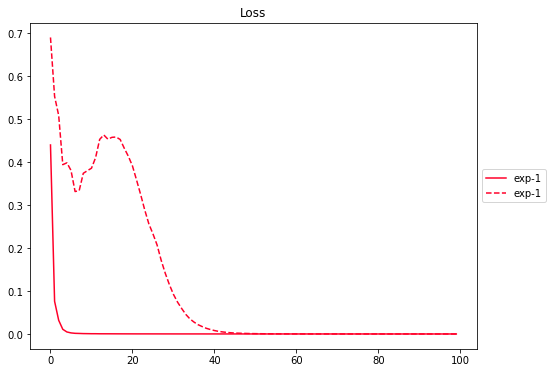

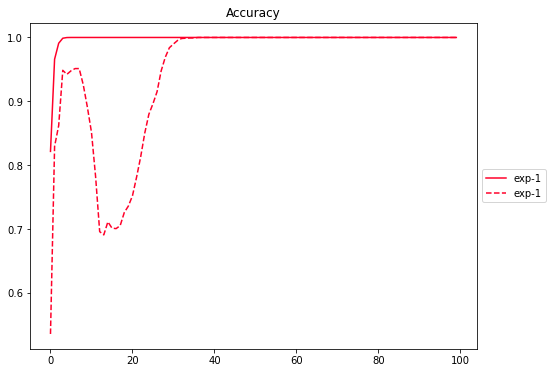

In [91]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = 20

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()